In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = glob.glob('raw_data/2016/monthly_weekday/*.csv')
names = path[0].split('/')
#months_list = ['jan-mar', 'apr-jun', 'jul-sep', 'oct-dec']
df = pd.DataFrame()
df.name = (f'{names[2]}_{names[1]}')

In [3]:
x = 0
for filepath in path:
    readfile = pd.read_csv(filepath)
    df_x = pd.DataFrame(readfile)
    #df_x['month'] = months_list[x]
    df_x['year'] = names[1]
    df = df.append(df_x, ignore_index=True)
    x += 1

In [4]:
df.head()

,sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,year
0,361,57,10,1580.15,506.34,1503.60,1.37,2016
1,216,407,12,1427.96,597.61,1335.90,1.41,2016
2,435,154,11,1568.84,554.01,1482.26,1.39,2016
3,464,512,12,979.27,408.89,927.66,1.36,2016
4,394,256,10,2171.50,651.06,2072.18,1.37,2016


In [5]:
geodata = {}
geo = pd.read_json('raw_data/washington_DC_censustracts.json')
for item in geo['features']:
    mid = int(item['properties']['MOVEMENT_ID'])
    address = item['properties']['DISPLAY_NAME']
    coord = item['geometry']['coordinates'][0][0][0]
    #lon = item['geometry']['coordinates'][0][0][0][0]
    geodata[mid] = (address, *coord)

In [ ]:
format((geodata[361][2]), '.10f')

In [7]:
for ind, row in df.iterrows():

    #df.at[ind, 'departure'] = geodata[row['sourceid']][0]
    #df.at[ind, 'destination'] = geodata[row['dstid']][0]
    df.at[ind, 'dep_lat'] = format(geodata[row['sourceid']][2], '.6f')
    df.at[ind, 'dep_lon'] = format(geodata[row['sourceid']][1], '.6f')
    df.at[ind, 'dest_lat'] = format(geodata[row['dstid']][2], '.6f')
    df.at[ind, 'dest_lon'] = format(geodata[row['dstid']][1], '.6f')
    #df.at[ind, 'coord_dest'] = (f'{geodata[row["dstid"]][2]}, {geodata[row["dstid"]][1]}')
    

In [19]:
df.count()

sourceid                                    1953728
dstid                                       1953728
month                                       1953728
mean_travel_time                            1953728
standard_deviation_travel_time              1953728
geometric_mean_travel_time                  1953728
geometric_standard_deviation_travel_time    1953728
year                                        1953728
dep_lat                                     1953728
dep_lon                                     1953728
dest_lat                                    1953728
dest_lon                                    1953728
dtype: int64

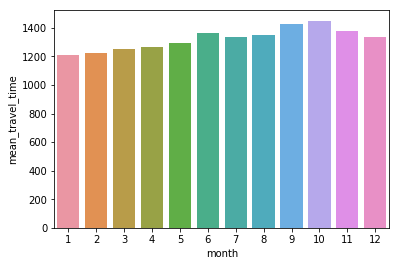

In [9]:
# Visualization of a mean travel time by hour
sns.barplot(x='month', y='mean_travel_time',
            data=(df[['mean_travel_time', 'month']].sample(frac=1)), ci=None)

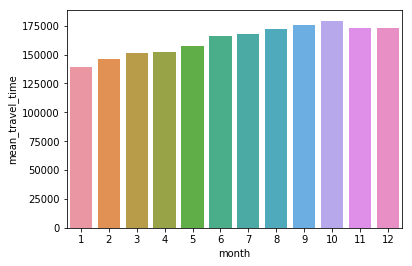

In [10]:
# Visualization of the number of rides by hour
sns.barplot(x='month', y='mean_travel_time',
                data=(df[['mean_travel_time', 'month']].groupby(['month']).count().reset_index()),
                ci=None)

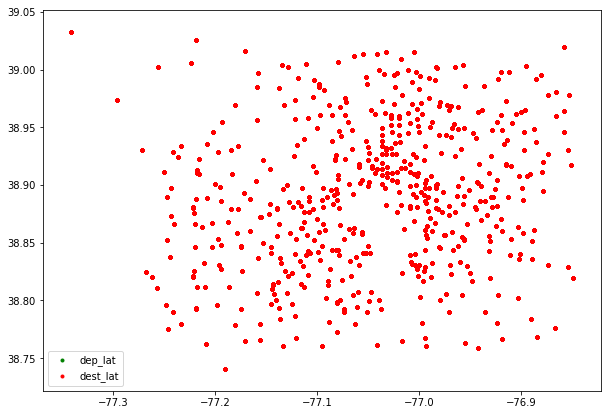

In [23]:
# Departure points
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
ax.scatter(x=pd.to_numeric(df['dep_lon']), y=pd.to_numeric(df['dep_lat']), data=df, marker = '.', color = 'g')
ax.scatter(x=pd.to_numeric(df['dest_lon']), y=pd.to_numeric(df['dest_lat']), data=df, marker = '.', color = 'r')
ax.legend(loc='best')

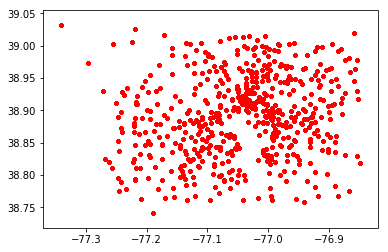

In [14]:
# Destination points
plt.scatter(x=pd.to_numeric(df['dest_lon']), y=pd.to_numeric(df['dest_lat']), marker = '.', color = 'red')